Załadowanie bibliotek

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

#Ustalenie stylu wykresów jako ggplot
# plt.style.use('ggplot')
from sklearn import preprocessing
from sklearn import tree
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
import pydotplus
from IPython.display import Image  
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score



Wczytanie danych

In [2]:
# Ustalenie ścieżki do datasetu
filename_forestfires = './forestfires.csv'

# Wczytanie datasetu jako dataframe
forestfires_dataframe = pd.read_csv(filename_forestfires, sep=";")

# Wyświetlenie dataframe
display(forestfires_dataframe)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.00
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00


Zbiór danych ma 517 wierszy i 13 kolumn (ostatnia kolumna to atrybut decyzyjny, a pozostałe 12 kolumn to atrybuty warunkowe). W celu dalszego zbadania datasetu i weryfikacji typów danych kategorycznych w każdej kolumnie, wypisano unikalne wartości każdej kolumny. Sprawdzono również, czy zbiór danych zawiera brakujące wartości lub niepotrzebne kolumny.

In [3]:
def attributes_count(dataframe):
    print("Liczba różnych wartości atrybutów dla każdej kolumny:")
    for x in dataframe.columns:
        uniq = dataframe[x].unique()
        print("{:>8}: {:>2}".format(x, uniq.shape[0]))
        
attributes_count(forestfires_dataframe)


Liczba różnych wartości atrybutów dla każdej kolumny:
       X:  9
       Y:  7
   month: 12
     day:  7
    FFMC: 106
     DMC: 215
      DC: 219
     ISI: 119
    temp: 192
      RH: 75
    wind: 21
    rain:  7
    area: 251


Zauważono, że spośród 12 atrybutów warunkowych, 4 z nich mają liczbę klas mniejeszą niż 10. Równiż atrybut month nie charakteryzuje się dużą liczbą klas. Z uwagi na chęć wyeliminowania zalezności modelu od położenia, dnia tygodnia i opadów deszczu, podjęto decyzję o usunięciu kolumn o liczbie klas mniejszej niż 10. Wartości atrybutu month przekształcono w następujący sposób: 'jan'=1, 'feb'=2, ..., 'dec'=12.
})

In [4]:
print("Rozmiar danych przed usunięciem: ",forestfires_dataframe.shape)     

# Usunięcie kolumn zawierających jedną wartośc
for col in forestfires_dataframe.columns.values:
    col_unique = forestfires_dataframe[col].unique()
    if len(col_unique) < 10:
        print("Usunięto kolumnę '{}',która zawiera liczbę klas poniżej 10: {}".format(col, col_unique))
        forestfires_dataframe = forestfires_dataframe.drop(col, 1)
        
print("Rozmiar danych po usunięciu: ",forestfires_dataframe.shape)

forestfires_dataframe.month = forestfires_dataframe.month.map({
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12,
})


Rozmiar danych przed usunięciem:  (517, 13)
Usunięto kolumnę 'X',która zawiera liczbę klas poniżej 10: [7 8 6 5 4 2 9 1 3]
Usunięto kolumnę 'Y',która zawiera liczbę klas poniżej 10: [5 4 6 3 2 9 8]
Usunięto kolumnę 'day',która zawiera liczbę klas poniżej 10: ['fri' 'tue' 'sat' 'sun' 'mon' 'wed' 'thu']
Usunięto kolumnę 'rain',która zawiera liczbę klas poniżej 10: [ 0.   0.2  1.   6.4  0.8  0.4  1.4]
Rozmiar danych po usunięciu:  (517, 9)


In [5]:
attributes_count(forestfires_dataframe)

Liczba różnych wartości atrybutów dla każdej kolumny:
   month: 12
    FFMC: 106
     DMC: 215
      DC: 219
     ISI: 119
    temp: 192
      RH: 75
    wind: 21
    area: 251


Z uwagi na brak danych kategorycznych w oczyszczonym zbiorze, kodowanie wartości atrybutów (kolumn) nie jest konieczne. Dokonać podziału danych na atrybuty warunkowe (zmienna X) i decyzyjne (zmienna Y).

In [6]:
X = forestfires_dataframe.drop(['area'], axis=1)
Y = forestfires_dataframe['area']

Kolejnym podziałem, który należy wykonać, jest podział danych na część treningową i testową. Założono, że rozmiar części testowej będzie wynosił 33% wszystkich danych. W celu zachowania powtarzalności wyników parametr random_state ustawiono na wartość 30 (ustawienie innej wartości bedzie powodowało wygenerowanie innego podziału danych i innego drzewa decyzyjnego).

In [7]:
random_state = 34

X_train, X_test ,Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state=random_state)

Utworzono funkcję sprawdzającą jakość klasyfikacji zbudowanego drzewa, funkcję budującą drzewo oraz funkcję sprawdzająca istotność atrybutu. Funkcji sprawdzająca jakość klasyfikacji zbudowanego drzewa, wypisuje wartości Accuracy, czyli współczynnik dokładności modelu do danych testowych, Precision - procent elementów będących istotnymi oraz Recall - procent istotnych elementów, które zostały wybrane.

In [8]:
def test_tree(clf, X_train, X_test, Y_train, Y_test, print_score=True):
#     clf       = clf.fit(X_train, Y_train)
#     score     = clf.score(X_test, Y_test)
#     precision = metrics.precision_score(Y_test, clf.predict(X_test))
#     recall    = metrics.recall_score(Y_test, clf.predict(X_test))
#     res = (score, precision,recall)
    
    preds=clf.predict(X_test)
    plt.plot(preds)
    plt.plot(Y_test.values)

    print(r2_score(Y_test, preds))

#     score = np.mean(cross_val_score(clf, X_test, Y_test, scoring='accuracy', n_jobs=1))
    
#     if print_score:
#         print("Accuracy: %.3f" % score)
#     return score



def build_tree(X, X_train, X_test, Y_train, Y_test, random_state, **kwargs):
    regr = tree.DecisionTreeRegressor(random_state=random_state, **kwargs)
    regr = regr.fit(X_train, Y_train)

    dot_data = tree.export_graphviz(regr, out_file=None,  
                                    feature_names=X.columns, 
                                    filled=True, rounded=True,  
                                    special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data)  
    display(Image(graph.create_png()))
    
    test_tree(regr, X_train, X_test, Y_train, Y_test);
    
    return regr

def attribute_importance(clf, X):
    attrs = X.columns.values
    attr_importance = clf.feature_importances_
    sorted_attr_importance = np.argsort(attr_importance)
    range_sorted_attr_importance = range(len(sorted_attr_importance))
    
    plt.figure(figsize=(8, 7))
    plt.barh(range_sorted_attr_importance, attr_importance[sorted_attr_importance], color='#33cc33')
    plt.yticks(range_sorted_attr_importance, attrs[sorted_attr_importance])
    plt.xlabel('Importance')
    plt.title('Attribute importances')
    plt.draw()
    plt.show()

W oparciu o przygotowane dane zbudowano drzewa decyzyjne.

1. Dokonano klasyfikacji zbioru danych z usuniętymi wierszami, które zawierały braki danych:

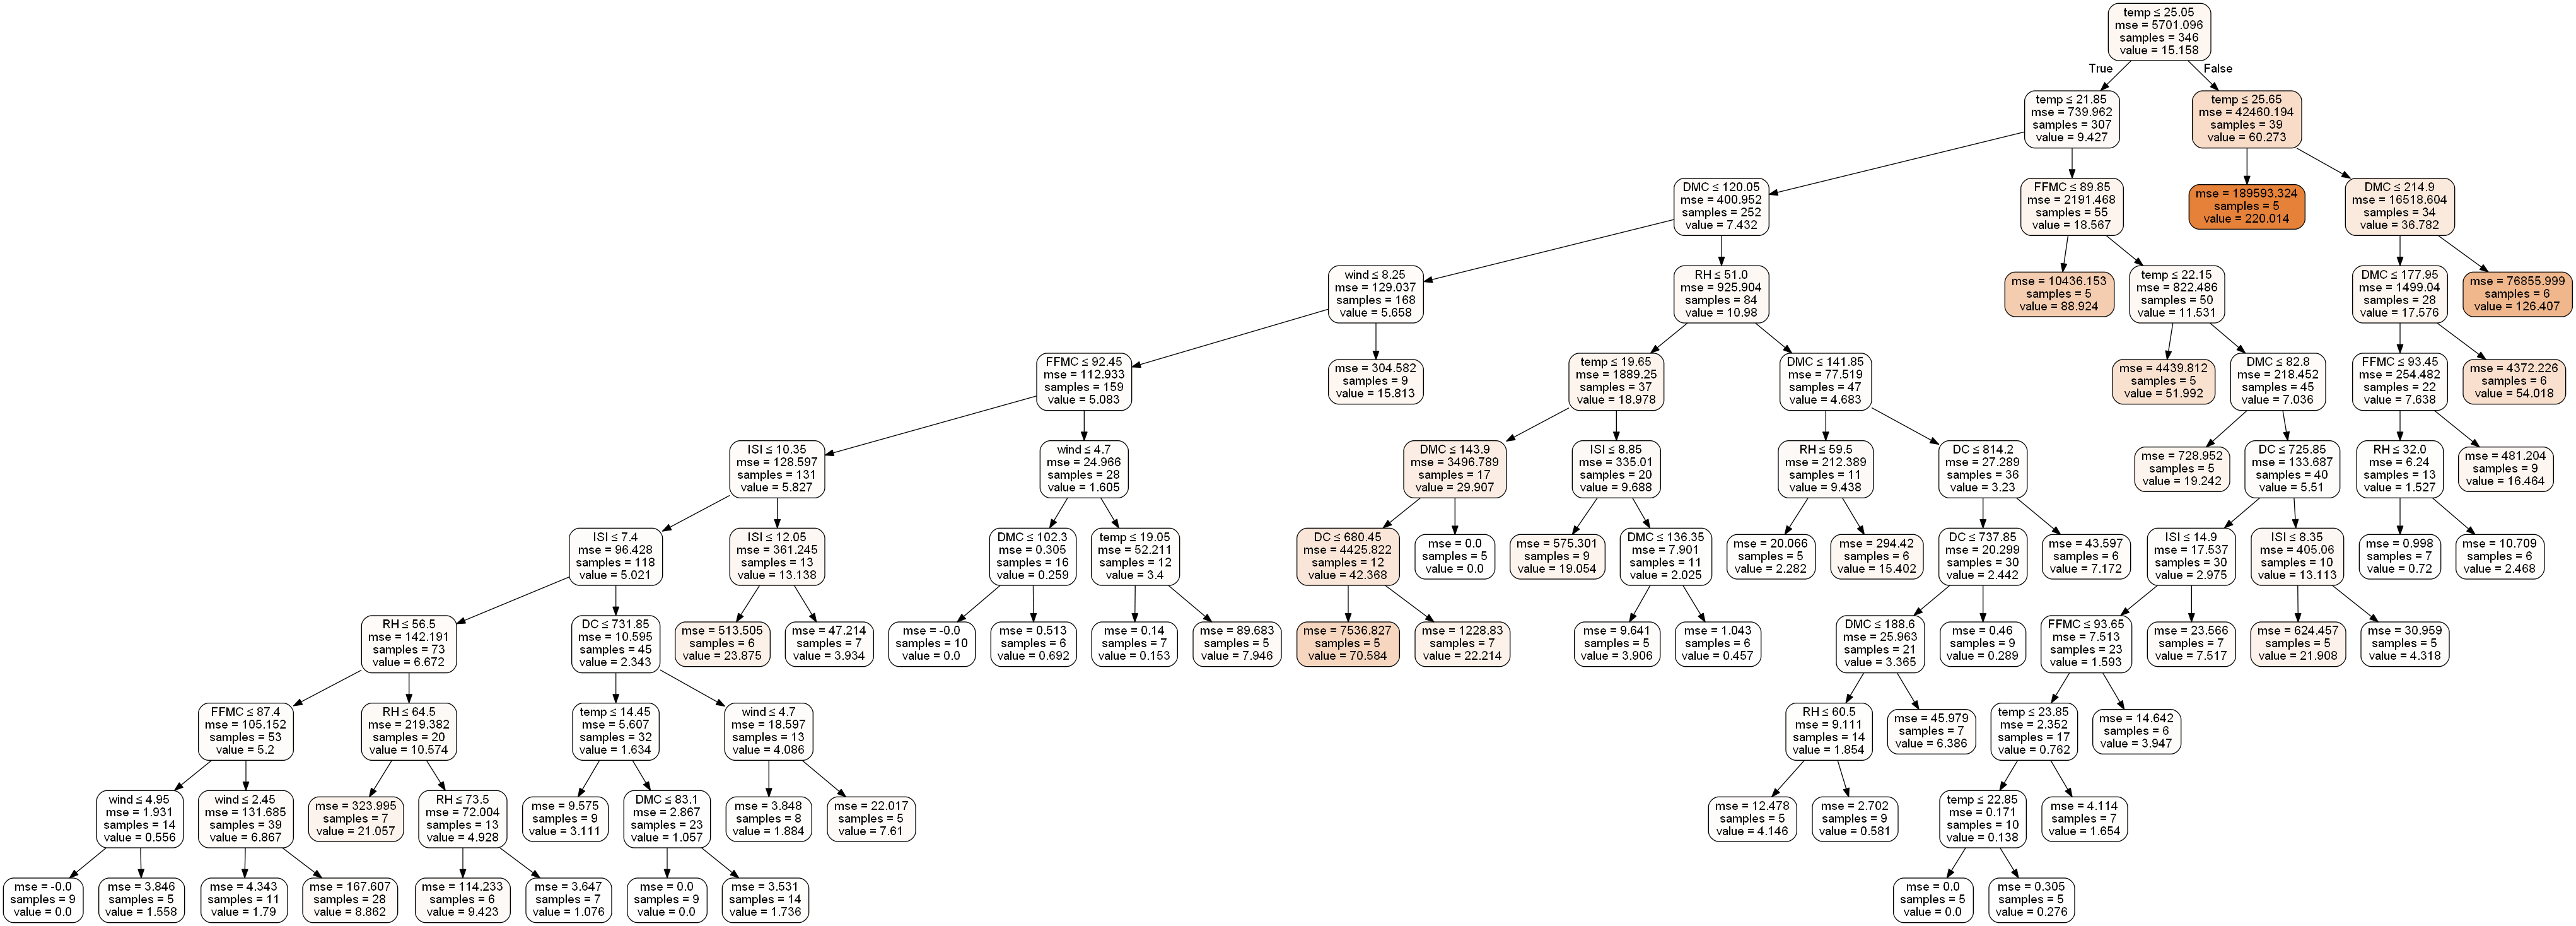

-1.78279883905


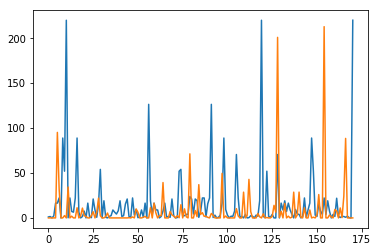

In [9]:
clf = build_tree(X, X_train, X_test, Y_train, Y_test, random_state, max_depth=10, min_samples_leaf = 5, criterion='mse')

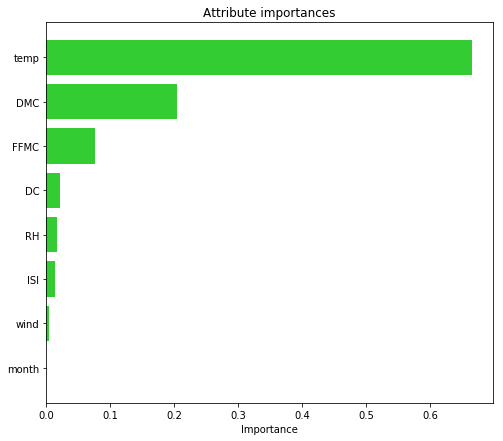

In [10]:
attribute_importance(clf, X)

Wygenerowane drzewo decyzyjne posiada głębokość wynoszącą 5. Ponadto zauważono, że najważnijszymi atrybutami są: spore-print-color oraz gill-size. Mniejsze znaczenie mają atrybuty: habitat, stalk-shape oraz cap-surface. Pozostałe atrybuty uznano za nieznaczące.

2. Dokonano klasyfikacji zbioru danych z usuniętymi kolumnami, które zawierały braki danych:

In [11]:
print(clf.predict([[1, 20, 26, 10, 2, 30, 75, 1]]))
print(clf.predict([[7, 100, 140, 550, 25, 30, 3, 6]]))

[ 2.46833333]
[ 16.46444444]
